<h1>Exploratory Data Analysis (EDA) of the Titanic Dataset</h1>
In this project, we embark on an exploratory journey into the Titanic dataset sourced from Kaggle. Our primary objective is to conduct comprehensive Exploratory Data Analysis (EDA) to gain insights into the dataset's features and their potential impact on survival outcomes. Through detailed examination, we explore various attributes such as passenger class, age and gender to uncover patterns and correlations. Utilizing a combination of statistical methods and visualization techniques, we delve into the intricate relationships within the data, seeking to understand the factors influencing survival rates aboard the Titanic. This project serves as a foundation for deeper understanding and future predictive modeling endeavors.

The dataset can be downloaded from <a href="https://www.kaggle.com/c/titanic/data">Kaggle</a><br>

[1. Imports and Reading Data](#cell_1)<br>
[2. Data Understanding](#cell_2)<br>
[3. Data Preparation](#cell_3)<br>
[4. Feature Understanding](#cell_4)<br>
[5. Feature Relationships](#cell_5)<br>

<h2>Imports and Reading Data</h2>
<a id = "cell_1"></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('data.csv')

<h2>Data Understanding</h2>
<a id = "cell_2"></a>

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>Data Preparation</h2>
<a id="cell_3"></a>

In [3]:
## Replacing the NaN values in Age column with the median Age
df['Age'] = df['Age'].fillna( df['Age'].median() )

In [4]:
## Removing the Cabin column
df = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<h2> Feature Understanding</h2>
<a id="cell_4"></a>

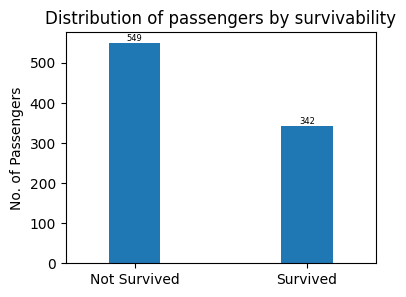

In [6]:
plt.figure(figsize=(4,3))
ax = df['Survived'].value_counts().plot(kind='bar', width=0.3)
ax.set_xlabel("")
ax.set_ylabel("No. of Passengers")
plt.xticks(range(2), ['Not Survived', 'Survived'],rotation=0)
for bar, value in zip(ax.patches, df['Survived'].value_counts()):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=6)
plt.title("Distribution of passengers by survivability")
plt.show()

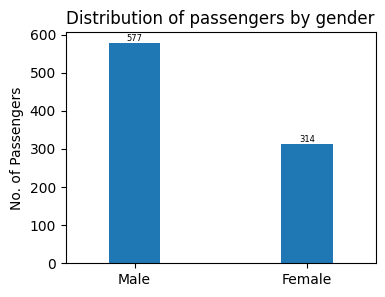

In [8]:
plt.figure(figsize=(4,3))
ax = df['Sex'].value_counts().plot(kind='bar', width=0.3)
ax.set_xlabel("")
ax.set_ylabel("No. of Passengers")
plt.xticks(range(2), ['Male', 'Female'],rotation=0)
for bar, value in zip(ax.patches, df['Sex'].value_counts()):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=6)
plt.title("Distribution of passengers by gender")
plt.show()

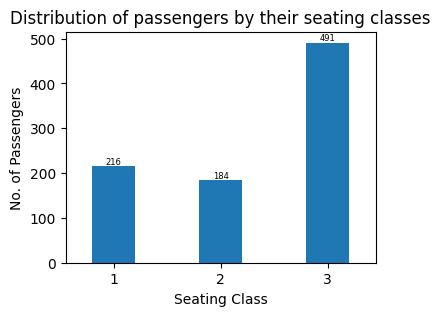

In [9]:
plt.figure(figsize=(4,3))
ax = df['Pclass'].value_counts().loc[[1,2,3]].plot(kind='bar', width=0.4)
ax.set_xlabel("Seating Class")
ax.set_ylabel("No. of Passengers")
plt.xticks(rotation=0)
for bar, value in zip(ax.patches, df['Pclass'].value_counts().loc[[1,2,3]]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=6)
plt.title("Distribution of passengers by their seating classes")
plt.show()

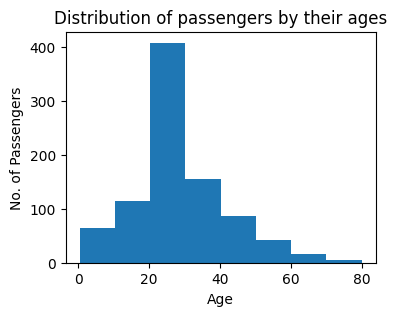

In [10]:
plt.figure(figsize=(4,3))
ax = df['Age'].plot(kind='hist',bins=8)
ax.set_xlabel("Age")
ax.set_ylabel("No. of Passengers")
plt.title("Distribution of passengers by their ages")
plt.show()

<h2> Feature Relationships</h2>
<a id="cell_5"></a>

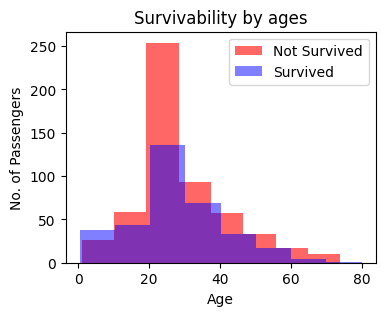

In [29]:
plt.figure(figsize=(4,3))
ax1 = df.loc[df['Survived']==0]['Age'].plot(kind='hist',alpha=0.6,color='red',bins=8)
ax2 = df.loc[df['Survived']==1]['Age'].plot(kind='hist',alpha=0.5,color='blue',bins=8)
ax1.set_xlabel("Age")
ax1.set_ylabel("No. of Passengers")
plt.title("Survivability by ages")
plt.legend(['Not Survived','Survived'])
plt.show()

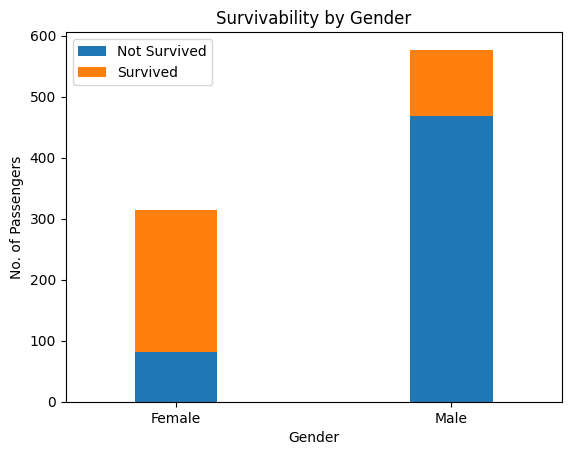

In [43]:
ax = (df.groupby(['Sex', 'Survived']).size().unstack()).plot(kind='bar', stacked=True, width=0.3,align='center')
ax.set_xlabel('Gender')
ax.set_ylabel('No. of Passengers')
plt.title('Survivability by Gender')
plt.xticks([1,0.],['Male', 'Female'],rotation=0)
plt.legend(['Not Survived','Survived'])
plt.show()

<Figure size 400x300 with 0 Axes>

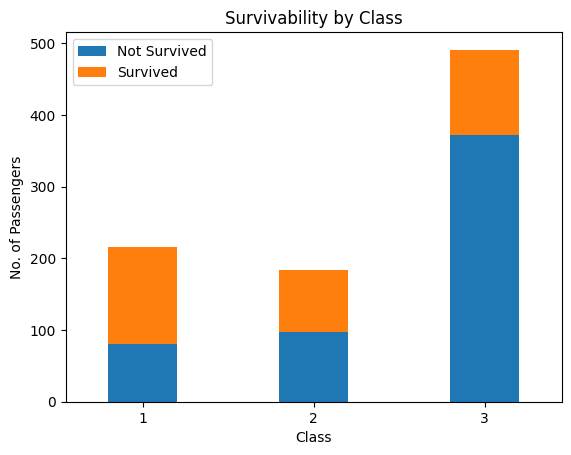

In [39]:
ax = df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, width=0.4, align='center')
ax.set_xlabel('Class')
ax.set_ylabel('No. of Passengers')
plt.title('Survivability by Class')
plt.xticks(rotation=0)
plt.legend(['Not Survived','Survived'])
plt.show()

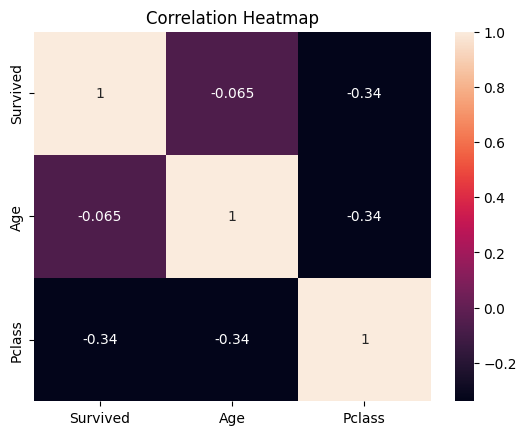

In [12]:
df_corr = df[['Survived','Age',
    'Pclass']].dropna().corr()
sns.heatmap(df_corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()